# Vahadane Demo

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import spams
import cv2
import utils
from vahadane import vahadane
from sklearn.manifold import TSNE

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
SOURCE_PATH = './data/i9*64.png'
TARGET_PATH = './data/i1.png'
RESULT_PATH = './output/i9*64_to_i1.png'

## Load source and target images

source image size:  (8602, 11469, 3)
target image size:  (1536, 2048, 3)


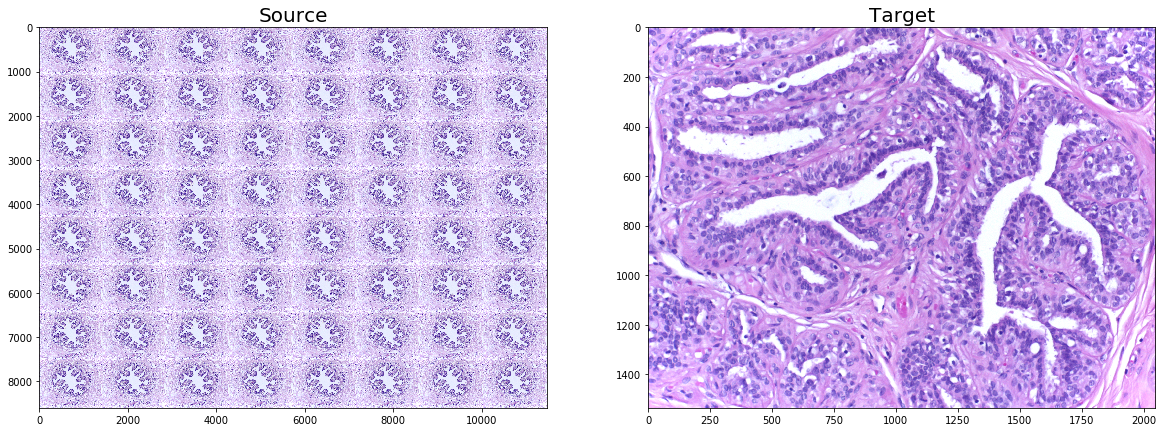

In [53]:
source_image = utils.read_image(SOURCE_PATH)
target_image = utils.read_image(TARGET_PATH)
print('source image size: ', source_image.shape)
print('target image size: ', target_image.shape)
plt.figure(figsize=(20.0, 20.0))
plt.subplot(1, 2, 1)
plt.title('Source', fontsize=20)
plt.imshow(source_image)
plt.subplot(1, 2, 2)
plt.title('Target', fontsize=20)
plt.imshow(target_image)
plt.show()

## Configuration

In [54]:
vhd = vahadane(LAMBDA1=0.01, LAMBDA2=0.01, fast_mode=1, getH_mode=0, ITER=50)
vhd.show_config()

STAIN_NUM = 2
THRESH = 0.9
LAMBDA1 = 0.01
LAMBDA2 = 0.01
ITER = 50
fast_mode = 1
getH_mode = 0


## Stain Separation and Color Normalization

In [55]:
Ws, Hs = vhd.stain_separate(source_image)
vhd.fast_mode=0;vhd.getH_mode=0;
Wt, Ht = vhd.stain_separate(target_image)

stain separation time: 91.61874413490295 s
stain separation time: 1.548396110534668 s


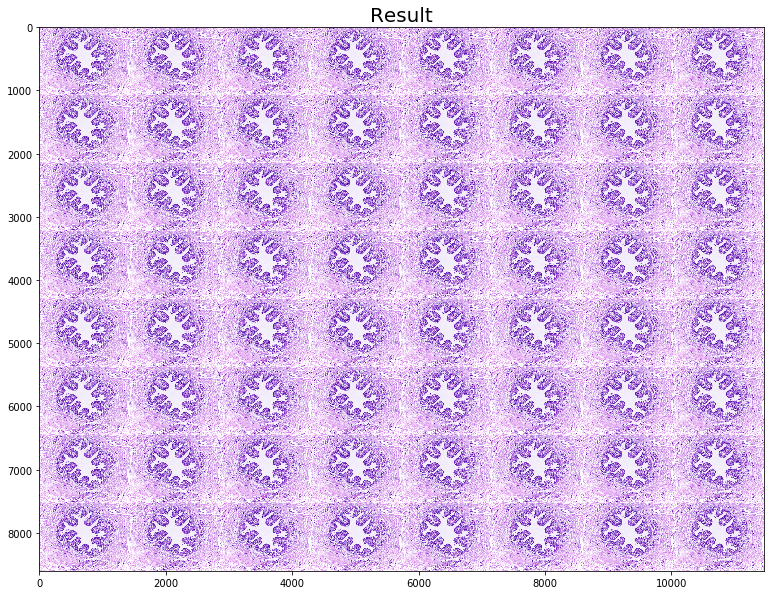

True

In [56]:
img = vhd.SPCN(source_image, Ws, Hs, Wt, Ht)
plt.figure(figsize=(20.0, 10.0))
plt.title('Result', fontsize=20)
plt.imshow(img)
plt.show()
cv2.imwrite(RESULT_PATH, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

STAIN_NUM = 2
THRESH = 0.9
LAMBDA1 = 0.01
LAMBDA2 = 0.01
ITER = 100
fast_mode = 0
getH_mode = 1
stain separation time: 0.3486642837524414 s
stain separation time: 0.42037034034729004 s


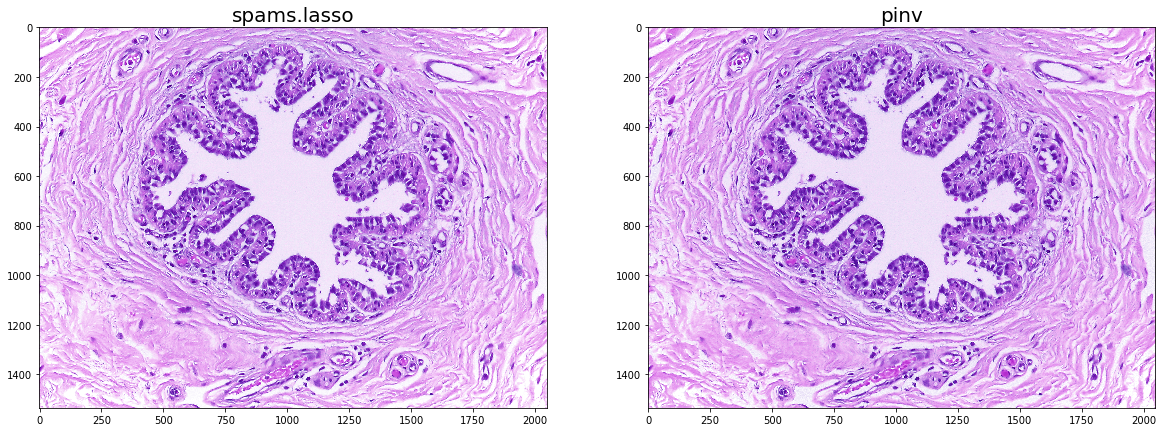

In [14]:
vhd2 = vahadane(LAMBDA1=0.01, LAMBDA2=0.01, fast_mode=0, getH_mode=1, THRESH=0.9)
vhd2.show_config()
Ws, Hs = vhd2.stain_separate(source_image)
vhd2.fast_mode=0;vhd.getH_mode=0;
Wt, Ht = vhd2.stain_separate(target_image)
img2 = vhd.SPCN(source_image, Ws, Hs, Wt, Ht)
plt.figure(figsize=(20.0, 10.0))
plt.subplot(1,2,1)
plt.title('spams.lasso', fontsize=20)
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('pinv',fontsize=20)
plt.imshow(img2)
plt.savefig(RESULT_PATH)
plt.show()

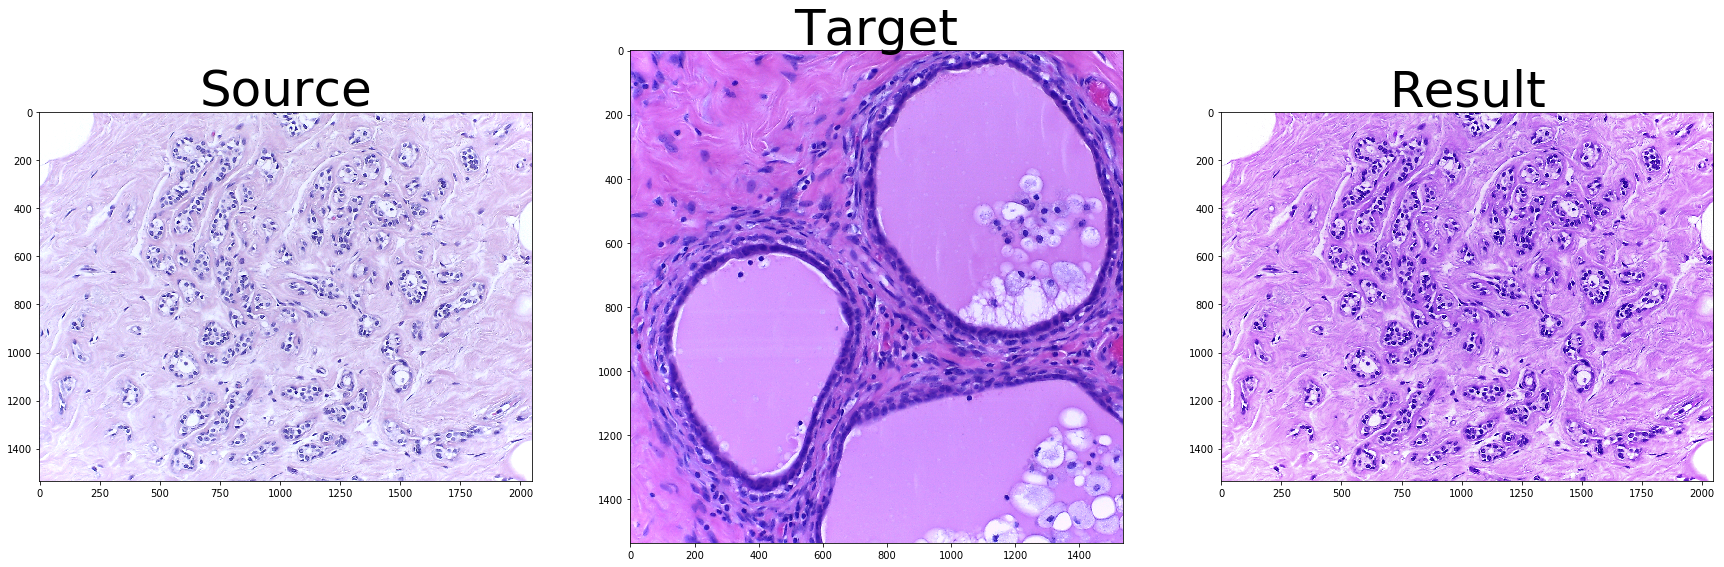

In [72]:
plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.title('Source', fontsize=50)
plt.imshow(source_image)
plt.subplot(1,3,2)
plt.title('Target', fontsize=50)
plt.imshow(target_image)
plt.subplot(1,3,3)
plt.title('Result', fontsize=50)
plt.imshow(img)
plt.savefig(RESULT_PATH)
plt.show()

In [63]:
tsne = TSNE(n_components=2, init='pca', random_state=19980723)
data = np.concatenate((img[:, :, 0], img[:, :, 1], img[:, :, 2]), axis=0)
print(data.shape)
result = tsne.fit_transform(data.T)
print(result)

(4608, 2048)
[[2106.4858 -391.9649]
 [2095.2236 -404.0319]
 [2080.2725 -424.4346]
 ...
 [1823.5199  924.9355]
 [1840.5743  923.1144]
 [1809.9283  936.6073]]


In [64]:
data = np.concatenate((source_image[:,:,0],source_image[:,:,1],source_image[:,:,2]), axis=0)
print(data.shape)
result0 = tsne.fit_transform(data.T)
print(result0)

(4608, 2048)
[[1415.4453  -188.57918]
 [1417.2627  -199.88196]
 [1406.1896  -205.21107]
 ...
 [1201.2427   573.72656]
 [1185.3607   580.50024]
 [1188.9469   568.2581 ]]


[[0.9736387  0.2000463 ]
 [0.97072655 0.19497696]
 [0.96686053 0.18640578]
 ...
 [0.9004704  0.75327647]
 [0.90488017 0.75251144]
 [0.89695585 0.7581798 ]]
[[0.98469037 0.28435   ]
 [0.98538494 0.2782291 ]
 [0.9811529  0.27534315]
 ...
 [0.90282464 0.6971698 ]
 [0.8967548  0.700838  ]
 [0.8981253  0.69420844]]


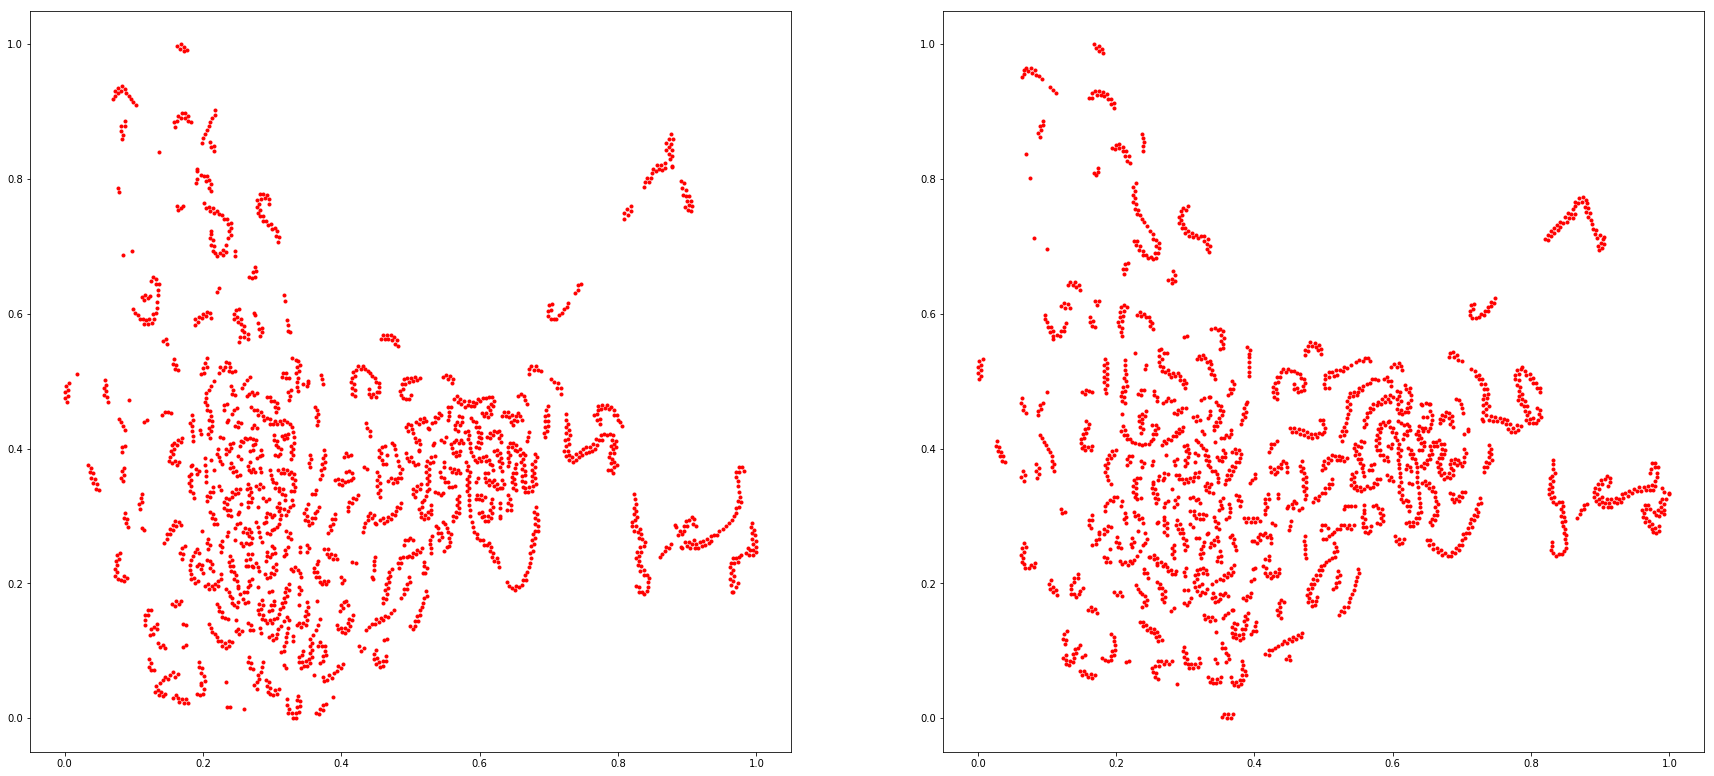

In [65]:
t_min = result.min(axis=0)
t_max = result.max(axis=0)
result = (result - t_min) / (t_max - t_min)
t_min = result0.min(axis=0)
t_max = result0.max(axis=0)
result0 = (result0 - t_min) / (t_max - t_min)
print(result)
print(result0)
plt.figure(figsize=(30, 30))
plt.subplot(2,2,1)
plt.plot(result[:, 0], result[:, 1], 'r.')
plt.subplot(2,2,2)
plt.plot(result0[:,0], result0[:,1], 'r.')
plt.show()